# Метод k-ближайших соседей (k-nearest neighbour)


<span style="font-size: 15px;">Для изучения данного алгоритма,реализую его самостоятельно,а далее уже буду использовать класс 'KNeighborsClassifier' из библеотеки Sklearn.</span><br>
<span style="font-size: 15px;">Для простоты будем работать со встроенным в Sklearn набором данных **wine**.</span><br>
<span style="font-size: 15px;">Загрузим набор данных и сохраним информацию о признаках в переменную X, а о зависимой переменной – в переменную y.</span><br>


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import mlxtend
data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']

<span style="font-size: 15px;">Для изучения данного алгоритма,реализую его самостоятельно,а далее уже буду использовать класс 'KNeighborsClassifier' из библеотеки Sklearn.</span><br>

In [44]:
# функция для вычисления Евклидова расстояния
def euclian_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
#самописный класс для алгоритма KNN 
class KNN:
    #конструктор, определяющий количество соседей
    def __init__(self, n_neighbors=1):
        self.k = n_neighbors
    #обучение модели на обучающих данных
    def fit(self, x_train, y_train):
        self.xt = x_train.values  
        self.yt = y_train 
    #предсказание данных на основе тестовых данных
    def predict(self, X):
        predictions = [self.classify(x) for x in X.values]  
        return predictions
    #классификация одной точки на основе k ближайших соседей
    def classify(self, x):
        counts = {}
        dist = [euclian_distance(x, x_train) for x_train in self.xt]
        k_index = np.argsort(dist)[:self.k]
        k_nearest = [self.yt[i] for i in k_index]  
        for label in k_nearest:
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1
        return max(counts.items(), key=lambda x: x[1])[0]   


<span style="font-size: 15px;">Для простоты будем работать со встроенным в Sklearn набором данных **wine**.</span><br>
<span style="font-size: 15px;">Загрузим набор данных и сохраним информацию о признаках в переменную X, а о зависимой переменной - в переменную y.</span><br>

In [48]:
data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']

<span style="font-size: 15px;">Используя функцию train_test_split(), разделим выборку на тренировочную и тестовую.Зафиксируем **np.random.seed()** для воспроизводимости результатов.</span><br>

In [56]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = X[['alcohol', 'magnesium']]
# Разделите выборку на тренировочную и тестовую с долей тестовой выборки 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,  # Используем фиксированный seed для воспроизводимости
    shuffle=True      # Перемешиваем данные перед разбиением
)


<span style="font-size: 15px;">Сравним результаты самописного алгоритма KNN и из библеотеки Sklearn.</span><br>

In [76]:
# Масштабирование признаков с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Массив значений k для классификатора kNN
k_array = [1, 3, 5, 10, 13, 15]
results = {}

# Обучение и оценка модели для каждого значения k
for k in k_array:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    
    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test_scaled)
    
    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy  # Сохраняем результаты в словаре

# Вывод результатов
for k, accuracy in results.items():
    print(f'Accuracy for KNN with k={k}: {accuracy:.2f}')

Accuracy for KNN with k=1: 0.67
Accuracy for KNN with k=3: 0.65
Accuracy for KNN with k=5: 0.69
Accuracy for KNN with k=10: 0.70
Accuracy for KNN with k=13: 0.67
Accuracy for KNN with k=15: 0.69


In [78]:

results=[]
for k in k_array:
    model=KNN(n_neighbors=k)
    model.fit(X_train,y_train)
    results.append(model)
for i, model in zip(k_array,results):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for KNN with k={i}: {accuracy:.2f}')

Accuracy for KNN with k=1: 0.61
Accuracy for KNN with k=3: 0.61
Accuracy for KNN with k=5: 0.69
Accuracy for KNN with k=10: 0.63
Accuracy for KNN with k=13: 0.59
Accuracy for KNN with k=15: 0.57



<span style="font-size: 15px;">Используя библеотеку **mlxtend**, визуализируем решающие поверхности обученных классификаторов.Рассмотрим случаи при различных значениях k.</span><br>

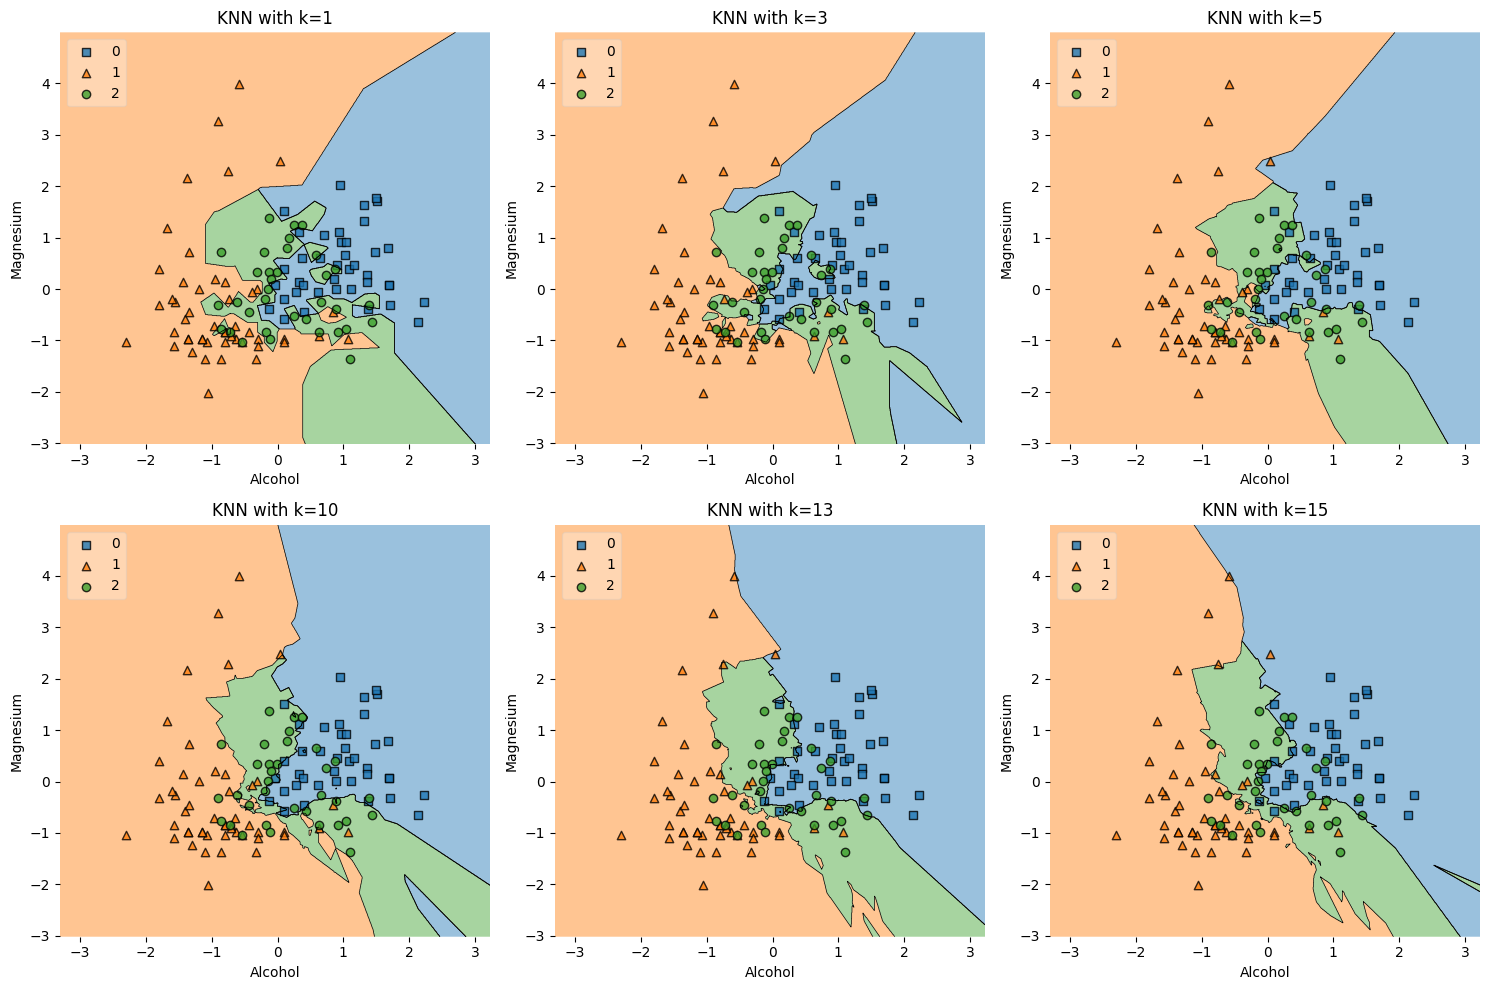

In [80]:
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_array):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    
    plt.subplot(2, 3, i + 1)  # Создаем сетку из подграфиков (2 строки и 3 столбца)
    
    # Строим решающие поверхности
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=model, legend=2)
    
    plt.title(f'KNN with k={k}')
    plt.xlabel('Alcohol')
    plt.ylabel('Magnesium')

plt.tight_layout()
plt.show()